<a href="https://colab.research.google.com/github/radara09/Tugas-Python/blob/main/Tugas_M13_Python%20Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAHMAT HIDAYAT F - 1101194238 - TT-43-G11


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
frek = [700, 900, 1800]
tipe_pilihan = ['urban', 'suburban', 'open']
ht = 80 #meter
hr = 1.5 #meter
d = np.arange(200,701)

In [30]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [31]:
dict_graph1 = {}
 
def grafik1_1800(frek,tipex):
  f1 = frek[2]
  for i in range(len(tipex)):
    tipe = tipex[i]
    #print(tipe)
    for i in range(len(d)):
      PL = cos(f1,tipe,ht,hr,d)
    dict_graph1[tipe]= PL
 
  #print(PL)
  print(dict_graph1)
  #print(dict_g1['urban'])
grafik1_1800(frek,tipex)

{'urban': array([169.64069205, 169.71094774, 169.78085477, 169.85041658,
       169.91963656, 169.98851806, 170.05706436, 170.12527872,
       170.19316433, 170.26072435, 170.32796189, 170.39488001,
       170.46148173, 170.52777003, 170.59374784, 170.65941807,
       170.72478356, 170.78984712, 170.85461155, 170.91907957,
       170.98325388, 171.04713715, 171.11073201, 171.17404105,
       171.23706683, 171.29981187, 171.36227866, 171.42446965,
       171.48638728, 171.54803393, 171.60941197, 171.67052372,
       171.7313715 , 171.79195756, 171.85228415, 171.91235348,
       171.97216775, 172.03172909, 172.09103965, 172.15010153,
       172.20891681, 172.26748753, 172.32581571, 172.38390337,
       172.44175248, 172.49936498, 172.55674281, 172.61388787,
       172.67080204, 172.72748718, 172.78394512, 172.84017768,
       172.89618665, 172.9519738 , 173.00754089, 173.06288963,
       173.11802175, 173.17293892, 173.22764283, 173.28213511,
       173.3364174 , 173.39049132, 173.444358

In [32]:
dict_graph2 = {}
 
def grafik2_urban(frek,tipex):
  tipe = tipex[0]
  for i in range(len(frek)):
    f2 = frek[i]
    #print(tipe)
    for i in range(len(d)):
      PL = cos(f2,tipe,ht,hr,d)
    dict_graph2[f2]= PL
 
  #print(PL)
  print(dict_graph2)
  #print(dict_g1['urban'])
grafik2_urban(frek,tipex)

{700: array([157.00163455, 157.07189025, 157.14179728, 157.21135909,
       157.28057907, 157.34946056, 157.41800686, 157.48622122,
       157.55410684, 157.62166686, 157.6889044 , 157.75582252,
       157.82242424, 157.88871253, 157.95469035, 158.02036057,
       158.08572606, 158.15078963, 158.21555405, 158.28002207,
       158.34419639, 158.40807966, 158.47167452, 158.53498356,
       158.59800934, 158.66075437, 158.72322116, 158.78541216,
       158.84732978, 158.90897644, 158.97035447, 159.03146623,
       159.092314  , 159.15290006, 159.21322666, 159.27329599,
       159.33311025, 159.3926716 , 159.45198216, 159.51104404,
       159.56985931, 159.62843003, 159.68675822, 159.74484588,
       159.80269499, 159.86030749, 159.91768532, 159.97483038,
       160.03174455, 160.08842968, 160.14488762, 160.20112018,
       160.25712916, 160.31291631, 160.36848339, 160.42383214,
       160.47896425, 160.53388143, 160.58858533, 160.64307761,
       160.69735991, 160.75143382, 160.80530095, 

In [33]:
#PLOT GRAFIK 1
def graph_1():
  plt.figure()
  plt.plot(d,dict_graph1['urban'],'b', label='Urban')
  plt.plot(d,dict_graph1['open'],'r', label='Open')
  plt.plot(d,dict_graph1['suburban'],'g', label='Suburban')
  plt.legend()
  plt.title("Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Path Loss (dB)")
  plt.show()
 
#PLOT GRAFIK 2
def graph_2():
  plt.figure()
  plt.plot(d,dict_graph2[700],'b', label='700 MHz')
  plt.plot(d,dict_graph2[900],'r', label='900 MHz')
  plt.plot(d,dict_graph2[1800],'g', label='1800 MHz')
  plt.legend()
  plt.title("Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Path Loss (dB)")
  plt.show()

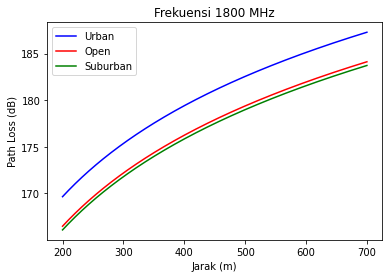

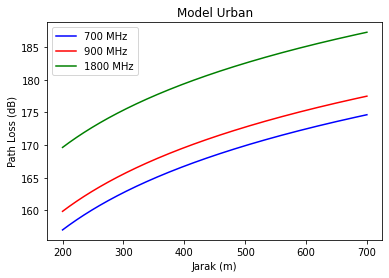

In [34]:
graph_1()
graph_2()